In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv("my_file.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Hotel,Review
0,Hotel review,Wonderful ambiance\nWide spread of food items ...
1,Hotel review,We stayed the night at this hotel along with m...
2,Hotel review,"Dear Guest,\nThank you so much for sharing you..."
3,Hotel review,"Monsoon had just arrived, there was a lull the..."
4,Hotel review,"Dear Guest,\nThank you very much for choosing ..."


In [17]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

document1 = []
stopwords = set(stopwords.words('english'))

for reviews in df["Review"]:
    word_token = word_tokenize(reviews)
    
    stre=''
    
    for w in word_token:
        if w not in stopwords:
            stre=stre+w+''
    document1.append(stre)
        
df["remove_stopwords"] = document1
df.head()

,Hotel,Review,remove_stopwords
0,Hotel review,Wonderful ambiance\nWide spread of food items ...,WonderfulambianceWidespreadfooditemsbreakfasts...
1,Hotel review,We stayed the night at this hotel along with m...,Westayednighthotelalonggrandmother.Receivedgoo...
2,Hotel review,"Dear Guest,\nThank you so much for sharing you...","DearGuest,Thankmuchsharingwonderfulexperienceu..."
3,Hotel review,"Monsoon had just arrived, there was a lull the...","Monsoonarrived,lullofficekidsholidaysPROVIDENC..."
4,Hotel review,"Dear Guest,\nThank you very much for choosing ...","DearGuest,ThankmuchchoosingstayJaipurMarriotHo..."


In [18]:
import nltk

def process_content():
    try:
        for stop_word in df["remove_stopwords"]:
            stopword = word_tokenize(stop_word)
            tagged = nltk.pos_tag(stopword)
            print(tagged)
    except Exception as e:
        print(str(e))

process_content()
    

[('WonderfulambianceWidespreadfooditemsbreakfastspecialattentionrestaurantstaffnchefsEnjoyeddeliciousdinnersaffronrestaurantaccompaniedlivemusic.Takeawaystravelaheadhighlight', 'MD')]
[('Westayednighthotelalonggrandmother.Receivedgoodwelcomehotelstaffwheelchairarrangedwelltimearrivalhotel.AlsoMinakshihotelstaffhelpful', 'JJ'), ('...', ':'), ('More', 'JJR')]
[('DearGuest', 'NNP'), (',', ','), ('Thankmuchsharingwonderfulexperienceus.Itgivesusimmensejoyknowinstrumentalmakingstayspecialmemorable.Itakegreatpridementioningfoodbeverageoutlets', 'VBZ'), ('...', ':'), ('More', 'JJR')]
[('Monsoonarrived', 'NNP'), (',', ','), ('lullofficekidsholidaysPROVIDENCE', 'NN'), ('!', '.'), ('!', '.'), ('plannedtakeshortfamilytripfourdays.Thenextproblemgo-goMussoorieShimla', 'NN'), ('...', ':'), ('More', 'JJR')]
[('DearGuest', 'NNP'), (',', ','), ('ThankmuchchoosingstayJaipurMarriotHotelmanyhoteloptionsavailablecity.AndIhappyreadfeedbackhighlightsmanypositiveareashotelfoundimpressive.Feedback', 'NNP'), ('.

In [19]:
from textblob import TextBlob

documents2 =[]
documents3 =[]

for review in df["Review"]:
    analysis = TextBlob(review)
    documents2.append(analysis.sentiment[0])
    
df["Polarity"] = documents2

for i in df["Polarity"]:
    #print(i)
    if i < 0.25:
        documents3.append("Negative")
    else:
        documents3.append("Positive")

df["Sentiment"] = documents3
df.head(200)

,Hotel,Review,remove_stopwords,Polarity,Sentiment
0,Hotel review,Wonderful ambiance\nWide spread of food items ...,WonderfulambianceWidespreadfooditemsbreakfasts...,0.482251,Positive
1,Hotel review,We stayed the night at this hotel along with m...,Westayednighthotelalonggrandmother.Receivedgoo...,0.636667,Positive
2,Hotel review,"Dear Guest,\nThank you so much for sharing you...","DearGuest,Thankmuchsharingwonderfulexperienceu...",0.522449,Positive
3,Hotel review,"Monsoon had just arrived, there was a lull the...","Monsoonarrived,lullofficekidsholidaysPROVIDENC...",0.000000,Negative
4,Hotel review,"Dear Guest,\nThank you very much for choosing ...","DearGuest,ThankmuchchoosingstayJaipurMarriotHo...",0.445284,Positive
5,Hotel review,well what should i say its a beautiful propert...,wellsaybeautifulproperty.lostmanagement.Ithoug...,0.350000,Positive
6,Hotel review,This is a perfect located hotel. The service w...,Thisperfectlocatedhotel.Theservicegreat.Eachst...,0.710000,Positive
7,Hotel review,"Dear Guest,\nThank you for choosing to stay wi...","DearGuest,Thankchoosingstayustakingtimerevieww...",0.875000,Positive
8,Hotel review,Place is a boutique hotel in Jodhpur. Partly a...,PlaceboutiquehotelJodhpur.Partlyresidencepartr...,0.013333,Negative
9,Hotel review,"Good food, ambience and strategic location (lo...","Goodfood,ambiencestrategiclocation(locatedcity...",0.251587,Positive


In [20]:
df["Sentiment"].value_counts()

Positive    113
Negative     30
Name: Sentiment, dtype: int64

[113, 30]


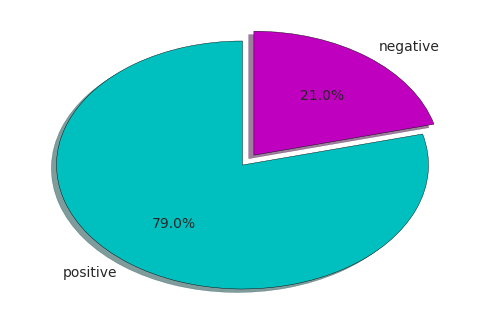

In [21]:
slices = [113,30]
activities = ['positive','negative']
cols = ['c','m']
plt.pie(slices,labels=activities,colors=cols,startangle=90,shadow=True,explode=(0,0.1),autopct='%1.1f%%')

print(slices)
plt.show()

In [22]:
df.to_csv("hotel_reviews.csv")

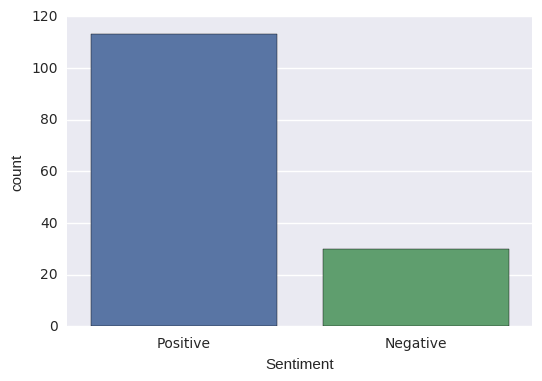

In [23]:
sns.countplot(x="Sentiment",data=df)